In [3]:
from datetime import datetime
import numpy as np
import pandas as pd
import torch
from torch.optim.lr_scheduler import StepLR

In [ ]:
# from google.colab import drive
# drive.mount("/content")

In [ ]:
# train_df = pd.read_csv("/content/drive/Mydrive/train_full.csv")
# val_df = pd.read_csv("/content/drive/Mydrive/val_full.csv")

In [4]:
train_df = pd.read_csv("train_full.csv")
val_df = pd.read_csv("val_full.csv")

In [5]:
train_df.columns

Index(['text_status', 'text', 'languages', 'image_url_status', 'image_url',
       'video_thumbnail_status', 'video_thumbnail_url', 'video_url_status',
       'video_url', 'video_bitrate', 'video_duration', 'video_views',
       'gif_thumbnail_status', 'gif_thumbnail_url', 'gif_url_status',
       'gif_url', 'gif_bitrate', 'year', 'month', 'day_of_year', 'day_of_week',
       'date', 'username', 'inferred company', 'likes'],
      dtype='object')

In [6]:
train_content = train_df["text"].values
val_content = val_df["text"].values

train_views = train_df["video_views"].values
val_views = val_df["video_views"].values

train_durations = train_df["video_duration"].values
val_durations = val_df["video_duration"].values

train_users = train_df["username"].values
val_users = val_df["username"].values

train_labels = train_df["likes"].values
val_labels = val_df["likes"].values

train_hasvids = np.array(train_df["video_url_status"].values != "Link does not exist")
val_hasvids = np.array(val_df["video_url_status"].values != "Link does not exist")

train_hasimgs = np.array(train_df["image_url_status"].values != "Link does not exist")
val_hasimgs = np.array(val_df["image_url_status"].values != "Link does not exist")

train_hasgifs = np.array(train_df["gif_url_status"].values != "Link does not exist")
val_hasgifs = np.array(val_df["gif_url_status"].values != "Link does not exist")

# train_captions = train_df["captions"].values
# val_captions = val_df["captions"].values

train_dates = train_df['date'].values
val_dates = val_df['date'].values

# Model Training

In [7]:
train_log_labels = []
for i in range(len(train_labels)):
  train_log_labels.append(np.log(1+train_labels[i]))

In [6]:
val_log_labels = []
for i in range(len(val_labels)):
  val_log_labels.append(np.log(1+val_labels[i]))

In [7]:
LN100 = 4.60517018599
LN4K = 8.2940496401
LN3K5 = 8.16051824748
LN10K = 9.21034037198

In [8]:
train_content_set_1 = []
train_labels_set_1 = []
train_views_set_1 = []
train_users_set_1 = []
train_duration_set_1 = []
train_hasvid_set_1 = []
train_hasimg_set_1 = []
train_hasgifs_set_1 = []
train_date_set_1 = []
train_captions_set_1 = []

train_content_set_2 = []
train_labels_set_2 = []
train_views_set_2 = []
train_users_set_2 = []
train_duration_set_2 = []
train_hasvid_set_2 = []
train_hasimg_set_2 = []
train_hasgifs_set_2 = []
train_date_set_2 = []
train_captions_set_2 = []

# train_content_set_3 = []
# train_labels_set_3 = []
# train_views_set_3 = []

# train_content_set_4 = []
# train_labels_set_4 = []
# train_views_set_4 = []

train_content_set_5 = []
train_labels_set_5 = []
train_views_set_5 = []
train_users_set_5 = []
train_duration_set_5 = []
train_hasvid_set_5 = []
train_hasimg_set_5 = []
train_hasgifs_set_5 = []
train_date_set_5 = []
train_captions_set_5 = []

val_content_set_1 = []
val_labels_set_1 = []
val_views_set_1 = []
val_users_set_1 = []
val_duration_set_1 = []
val_hasvid_set_1 = []
val_hasimg_set_1 = []
val_hasgifs_set_1 = []
val_date_set_1 = []
val_captions_set_1 = []

val_content_set_2 = []
val_labels_set_2 = []
val_views_set_2 = []
val_users_set_2 = []
val_duration_set_2 = []
val_hasvid_set_2 = []
val_hasimg_set_2 = []
val_hasgifs_set_2 = []
val_date_set_2 = []
val_captions_set_2 = []

# val_content_set_3 = []
# val_labels_set_3 = []
# val_views_set_3 = []
# val_content_set_4 = []
# val_labels_set_4 = []
# val_views_set_4 = []

val_content_set_5 = []
val_labels_set_5 = []
val_views_set_5 = []
val_users_set_5 = []
val_duration_set_5 = []
val_hasvid_set_5 = []
val_hasimg_set_5 = []
val_hasgifs_set_5 = []
val_date_set_5 = []
val_captions_set_5 = []

train_classes = []
val_classes = []

In [9]:
for i in range(len(train_log_labels)):
  if train_log_labels[i] <= LN100:
    train_classes.append(0)
    train_content_set_1.append(train_content[i])
    train_views_set_1.append(train_views[i])
    train_users_set_1.append(train_users[i])
    train_labels_set_1.append(train_log_labels[i])
    train_duration_set_1.append(train_durations[i])
    train_hasvid_set_1.append(train_hasvids[i])
    train_hasimg_set_1.append(train_hasimgs[i])
    train_hasgifs_set_1.append(train_hasgifs[i])
    train_date_set_1.append(train_dates[i])
    # train_captions_set_1.append(train_captions[i])

  elif train_log_labels[i] > LN100 and train_log_labels[i] <= LN3K5:
    train_classes.append(1)
    train_content_set_2.append(train_content[i])
    train_views_set_2.append(train_views[i])
    train_users_set_2.append(train_users[i])
    train_labels_set_2.append(train_log_labels[i])
    train_duration_set_2.append(train_durations[i])
    train_hasvid_set_2.append(train_hasvids[i])
    train_hasimg_set_2.append(train_hasimgs[i])
    train_hasgifs_set_2.append(train_hasgifs[i])
    train_date_set_2.append(train_dates[i])
    # train_captions_set_2.append(train_captions[i])
  
  # elif train_log_labels[i] > 4.6 and train_log_labels[i] <= 6.9:
  #   train_classes.append(2)
  #   train_content_set_3.append(train_content[i])
  #   train_labels_set_3.append(train_log_labels[i])
  # elif train_log_labels[i] > 6.9 and train_log_labels[i] <= 9.2:
  #   train_classes.append(3)
  #   train_content_set_4.append(train_content[i])
  #   train_labels_set_4.append(train_log_labels[i])
  else:
    train_classes.append(4)
    train_content_set_5.append(train_content[i])
    train_views_set_5.append(train_views[i])
    train_users_set_5.append(train_users[i])
    train_labels_set_5.append(train_log_labels[i])
    train_duration_set_5.append(train_durations[i])
    train_hasvid_set_5.append(train_hasvids[i])
    train_hasimg_set_5.append(train_hasimgs[i])
    train_hasgifs_set_5.append(train_hasgifs[i])
    train_date_set_5.append(train_dates[i])
    # train_captions_set_5.append(train_captions[i])

for i in range(len(val_log_labels)):
  if val_log_labels[i] <= LN100:
    val_classes.append(0)
    val_content_set_1.append(val_content[i])
    val_views_set_1.append(val_views[i])
    val_users_set_1.append(val_users[i])
    val_labels_set_1.append(val_log_labels[i])
    val_duration_set_1.append(val_durations[i])
    val_hasvid_set_1.append(val_hasvids[i])
    val_hasimg_set_1.append(val_hasimgs[i])
    val_hasgifs_set_1.append(val_hasgifs[i])
    val_date_set_1.append(val_dates[i])
    # val_captions_set_1.append(val_captions[i])

  elif val_log_labels[i] > LN100 and val_log_labels[i] <= LN3K5:
    val_classes.append(1)
    val_content_set_2.append(val_content[i])
    val_views_set_2.append(val_views[i])
    val_users_set_2.append(val_users[i])
    val_labels_set_2.append(val_log_labels[i])
    val_duration_set_2.append(val_durations[i])
    val_hasvid_set_2.append(val_hasvids[i])
    val_hasimg_set_2.append(val_hasimgs[i])
    val_hasgifs_set_2.append(val_hasgifs[i])
    val_date_set_2.append(val_dates[i])
    # val_captions_set_2.append(val_captions[i])

  # elif val_log_labels[i] > 4.6 and val_log_labels[i] <= 6.9:
  #   val_classes.append(2)
  #   val_content_set_3.append(val_content[i])
  #   val_labels_set_3.append(val_log_labels[i])
  # elif val_log_labels[i] > 6.9 and val_log_labels[i] <= 9.2:
  #   val_classes.append(3)
  #   val_content_set_4.append(val_content[i])
  #   val_labels_set_4.append(val_log_labels[i])
  else:
    val_classes.append(4)
    val_content_set_5.append(val_content[i])
    val_views_set_5.append(val_views[i])
    val_users_set_5.append(val_users[i])
    val_labels_set_5.append(val_log_labels[i])
    val_duration_set_5.append(val_durations[i])
    val_hasvid_set_5.append(val_hasvids[i])
    val_hasimg_set_5.append(val_hasimgs[i])
    val_hasgifs_set_5.append(val_hasgifs[i])
    val_date_set_5.append(val_dates[i])
    # val_captions_set_5.append(val_captions[i])
    
# len(train_labels_set_3), len(train_labels_set_4), 
len(train_labels_set_1), len(train_labels_set_2), len(train_labels_set_5)

(114309, 86406, 8086)

In [10]:
len(val_labels_set_1), len(val_labels_set_2), len(val_labels_set_5)

(16513, 12300, 1114)

In [11]:
import torch
# from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
!pip3 install emoji==0.6.0

  Using cached emoji-0.6.0-py3-none-any.whl


In [12]:
def number_to_words(number):
    if 0 <= number <= 999999:
        ones = ["", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]
        teens = ["", "Eleven", "Twelve", "Thirteen", "Fourteen", "Fifteen", "Sixteen", "Seventeen", "Eighteen", "Nineteen"]
        tens = ["", "Ten", "Twenty", "Thirty", "Forty", "Fifty", "Sixty", "Seventy", "Eighty", "Ninety"]

        def convert_below_thousand(num):
            if num == 0:
                return ""
            elif num < 10:
                return ones[num]
            elif num==10:
                return "Ten"
            elif num < 20:
                return teens[num - 10]
            elif num < 100:
                return tens[num // 10] + " " + convert_below_thousand(num % 10)
            else:
                return ones[num // 100] + " Hundred " + convert_below_thousand(num % 100)

        if number == 0:
            return "Zero"
        else:
            result = ""
            if number // 1000 > 0:
                result += convert_below_thousand(number // 1000) + " Thousand "
            result += convert_below_thousand(number % 1000)
            return result.strip()

    else:
        return "Number out of range (0-500,000)"

In [35]:
def construct_tweet_prompt(has_video, has_img, text, view, user):
    prompt = "The tweet content is \"" + text + "\""

    if has_video:
        try:
            prompt += " with the view count of the video being " + number_to_words(int(view)) + "(" + view + ")"
        except:
            pass
    if has_image:
        prompt += " and it includes an image"
    else:
        prompt+= " but it does not include an image"

    prompt += "!! The tweet is posted by " + user

    # date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    # date_in_words = date_obj.strftime('%A, %B %d, %Y %I:%M %p')
    # prompt += "It was posted on " + date_in_words + ". How many likes did the tweet get?"
    prompt += ". How many likes did the tweet get?"

    return prompt

In [31]:
# def construct_tweet_prompt(text, view, duration, user, has_video, has_image, date):
#     prompt = "The tweet content is: \"" + text + "\""
#     prompt += "! It is posted by the user named " + user + "!!! "
    
#     if has_video:
#         try:
#             prompt += f"The view count of the video being {number_to_words(int(view))} ({view})!!! The duration of the video is {duration} minutes"
#             # prompt += " with the view count of the video being " + number_to_words(int(view)) + "(" + view + ")!!! Also note that the duration of the video is " + duration + " minutes"
#         except:
#             pass
#     else:
#         prompt += " but it does not include a video"

#     if has_image:
#         prompt += ", it includes an image"
#     else:
#         prompt += ", it does not include an image"

#     # if captions!="not available":
#     #     prompt += ", it includes an image"
#     # else:
#     #     prompt += ", it does not include an image"
        
#     # prompt += ". The captions describing the media are " + captions
#     # if has_gif:
#     #     prompt += " but it includes a Graphics Interchange Format (GIF)"
#     # else:
#     #     prompt += " but it does not include a Graphics Interchange Format (GIF)"

#     date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
#     date_in_words = date_obj.strftime('%A, %B %d, %Y %I:%M %p')
#     prompt += ". It was posted on " + date_in_words + ". How many likes did the tweet get?"

#     return prompt

In [17]:
# Example usage:
has_video = True
has_image = False
has_gif = True
text = "Exciting tweet content"
views = '10240'
duration = '36.63'
users = "user1"
date = "2023-01-15 12:30:00"
captions = "These are sample captions"

# prompt = construct_tweet_prompt(text, views, duration, users, has_video, has_image, date, captions)
print(construct_tweet_prompt(True, text, views, users))

The tweet content is "Exciting tweet content" with the view count of the video being Ten Thousand Two Hundred Forty(10240)!! The tweet is posted by user1. How many likes did the tweet get?


In [39]:
class CustomRegressionDataset(Dataset):
    def __init__(self, dates, has_videos, has_images, texts, views, duration, users, labels, tokenizer, max_length):
        self.texts = texts
        self.views = views
        self.users = users
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.has_videos = has_videos
        self.has_images = has_images
        self.dates = dates
        self.duration = duration

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # print(idx)
        text = construct_tweet_prompt(self.has_videos[idx], self.has_images[idx], self.texts[idx], self.views[idx], self.users[idx])
        # text = construct_tweet_prompt(self.texts[idx], self.views[idx], self.duration[idx], self.users[idx], self.has_videos[idx], self.has_images[idx], self.dates[idx])
        # print(text)
        label = float(self.labels[idx])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float32)
        }

In [40]:
# class CustomRegressionDataset(Dataset):
#     def __init__(self, dates, captions, has_videos, has_images, texts, views, duration, users, labels, tokenizer, max_length):
#         self.texts = texts
#         self.views = views
#         self.durations = duration
#         self.users = users
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_length = max_length
#         self.has_videos = has_videos
#         self.has_images = has_images
#         # self.has_gifs = has_gifs
#         self.captions = captions
#         self.dates = dates

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         text = construct_tweet_prompt(self.texts[idx], self.views[idx], self.durations[idx], self.users[idx], self.has_videos[idx], self.has_images[idx], self.dates[idx], self.captions[idx])
#         label = float(self.labels[idx])
#         encoding = self.tokenizer.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=self.max_length,
#             return_token_type_ids=False,
#             padding='max_length',
#             truncation=True,
#             return_attention_mask=True,
#             return_tensors='pt'
#         )
#         return {
#             'input_ids': encoding['input_ids'].flatten(),
#             'attention_mask': encoding['attention_mask'].flatten(),
#             'labels': torch.tensor(label, dtype=torch.float32)
#         }

In [41]:
tokenizer = AutoTokenizer.from_pretrained('vinai/bertweet-base')
model = AutoModelForSequenceClassification.from_pretrained('vinai/bertweet-base', num_labels=1)

criterion = nn.MSELoss()

train_texts = train_content_set_2
val_texts = val_content_set_2

train_views = train_views_set_2
val_views = val_views_set_2

train_users = train_users_set_2
val_users = val_users_set_2

train_durations = train_duration_set_2
val_durations = val_duration_set_2

train_labels = train_labels_set_2
val_labels = val_labels_set_2

train_hasvids = train_hasvid_set_2
val_hasvids = val_hasvid_set_2

train_hasimgs = train_hasimg_set_2
val_hasimgs = val_hasimg_set_2

# train_hasgifs = train_hasgifs_set_1
# val_hasgifs = val_hasgifs_set_1

train_dates = train_date_set_2
val_dates = val_date_set_2

train_captions = train_captions_set_2
val_captions = val_captions_set_2

# train_dataset = CustomRegressionDataset(train_dates, train_captions, train_hasvids, train_hasimgs, train_texts, train_views, train_durations, train_users, train_labels, tokenizer, max_length=128)
# val_dataset = CustomRegressionDataset(val_dates, val_captions, val_hasvids, val_hasimgs, val_texts, val_views, val_durations, val_users, val_labels, tokenizer, max_length=128)

train_dataset = CustomRegressionDataset(train_dates, train_hasvids, train_hasimgs, train_texts, train_views, train_durations, train_users, train_labels, tokenizer, max_length=128)
val_dataset = CustomRegressionDataset(val_dates, val_hasvids, val_hasimgs, val_texts, val_views, val_durations, val_users, val_labels, tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(130, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [42]:
num_epochs = 1
optimizer = optim.Adam(model.parameters(), lr=1e-5)
# scheduler = StepLR(optimizer, step_size=456, gamma=1/3)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    with tqdm(total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}", unit='batch') as progress_bar:
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            loss.backward()
            optimizer.step()
            # scheduler.step()

            running_loss += loss.item()
            progress_bar.set_postfix({'loss': running_loss / (progress_bar.n + 1)})
            progress_bar.update(1)

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}] Loss: {epoch_loss}")

Epoch 1/1: 100%|██████████| 2701/2701 [14:10<00:00,  3.17batch/s, loss=1.3] 

Epoch [1/1] Loss: 1.2957609075555003


In [8]:
model.eval()
val_loss = 0.0
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        logits = outputs.logits
        loss = outputs.loss
        val_loss += loss.item()

average_val_loss = val_loss / len(val_loader)
print(f"Validation Loss: {average_val_loss}")

NameError: name 'model' is not defined

In [53]:
torch.save(model, 'model_100-3K5_content+views+img+username+date.pth')

## Model Testing

In [44]:
tokenizer = AutoTokenizer.from_pretrained('vinai/bertweet-base')

criterion = nn.MSELoss()

# train_dataset = CustomRegressionDataset(train_dates, train_captions, train_hasvids, train_hasimgs, train_texts, train_views, train_durations, train_users, train_labels, tokenizer, max_length=128)
# val_dataset = CustomRegressionDataset(val_dates, val_captions, val_hasvids, val_hasimgs, val_texts, val_views, val_durations, val_users, val_labels, tokenizer, max_length=128)
# train_dataset = CustomRegressionDataset(train_dates, train_hasvids, train_hasimgs, train_texts, train_views, train_durations, train_users, train_labels, tokenizer, max_length=128)
# val_dataset = CustomRegressionDataset(val_dates, val_hasvids, val_hasimgs, val_texts, val_views, val_durations, val_users, val_labels, tokenizer, max_length=128)
train_dataset = CustomRegressionDataset(train_dates, train_hasvids, train_hasimgs, train_texts, train_views, train_durations, train_users, train_labels, tokenizer, max_length=128)
val_dataset = CustomRegressionDataset(val_dates, val_hasvids, val_hasimgs, val_texts, val_views, val_durations, val_users, val_labels, tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [21]:
model1 = torch.load('model_0-100_username.pth')

In [45]:
model.to(device)

cnt = 0
ans = []
labs = []
batch_order=[]

model.eval()
val_loss = 0.0
with torch.no_grad():
    for i,batch in enumerate(val_loader):
        cnt += 32
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        ans.extend(outputs.logits)
        labs.extend(labels)
        loss = outputs.loss
        val_loss += loss.item()

average_val_loss = val_loss / len(val_dataset)
print(f"Validation Loss: {average_val_loss}")

Validation Loss: 0.01519450287387623


In [46]:
import math
predicted_arr = []
for i in ans:
  predicted_arr.append(math.exp(i[0])-1)

fin_preds = np.array(predicted_arr)
fin_preds

array([1149.65008355,  317.44921773,  740.85743265, ...,  930.54006377,
        233.4274522 ,  267.37129848])

In [47]:
fin_labels = np.exp([i.item() for i in labs])-1
fin_labels

array([ 672.00008294,  960.99981961,  266.00003839, ..., 2150.99984898,
        166.00000321,  114.99999024])

In [52]:
# from scipy.stats import median
for i in range(100,70,-1):
    mean = np.mean(fin_preds[fin_preds>=i])
    fin_preds[fin_preds>=i] = mean
    mse = mean_squared_error(fin_labels,fin_preds)
    rmse = math.sqrt(mse)
    r2 = r2_score(fin_labels,fin_preds)
    print("for i = ",i,"\t R2: ",r2, "\t RMSE: ", rmse)

for i =  100 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  99 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  98 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  97 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  96 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  95 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  94 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  93 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  92 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  91 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  90 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  89 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  88 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  87 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  86 	 R2:  0.7258908011349183 	 RMSE:  16.177401242138068
for i =  

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.10/si

In [138]:
mean = np.mean(fin_preds[fin_preds>=82])
fin_preds[fin_preds>=82] = mean

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(fin_labels,fin_preds)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)

RMSE:  582.7294844492758


In [49]:
r2 = r2_score(fin_labels,fin_preds)
print("R2: ",r2)

R2:  0.311513895067562


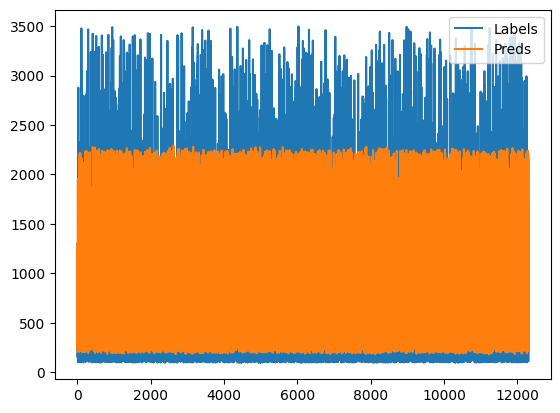

In [68]:
import matplotlib.pyplot as plt

plt.plot(fin_labels)
plt.plot(fin_preds)
plt.legend(['Labels','Preds'])

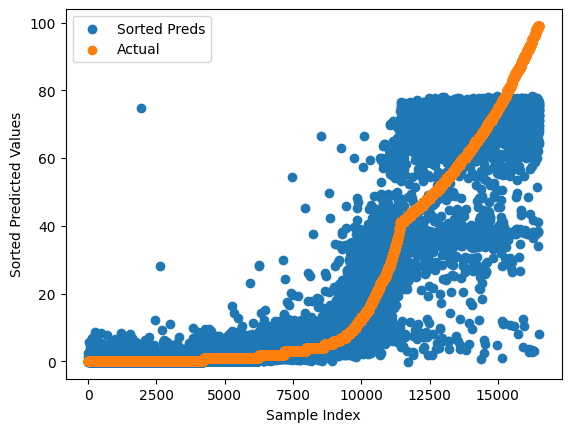

In [29]:
fin_preds = np.array(fin_preds)

# Sort predicted values in increasing order
sorted_indices = np.argsort(fin_labels).tolist()

fin_preds = fin_preds[sorted_indices]
fin_labels = fin_labels[sorted_indices]

# Create a scatter plot

plt.scatter(range(len(fin_preds)), fin_preds, label='Sorted Preds')
plt.scatter(range(len(fin_labels)), fin_labels, label='Actual')
# Add labels and legend
plt.xlabel('Sample Index')
plt.ylabel('Sorted Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [30]:
sorted_indices = np.argsort(fin_labels)

In [31]:
si = sorted_indices.tolist()

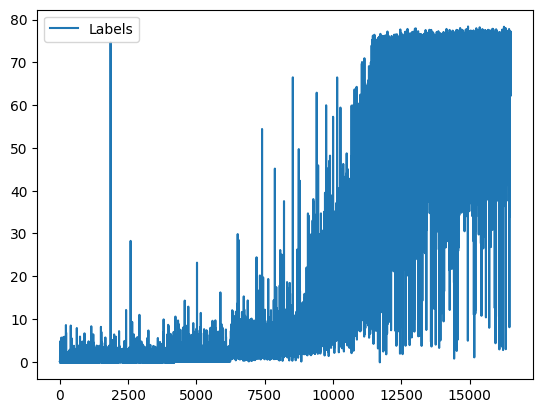

In [32]:
# Sort array1 in increasing order
sorted_fin_labels = fin_labels[si]

# Use the sorted indices to rearrange array2
sorted_fin_preds = fin_preds[si]

plt.plot(sorted_fin_preds)
plt.legend(['Labels','Preds'])

In [42]:
np.bincount(fin_preds)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [44]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.3 MB/s eta 0:00:00a 0:00:01m


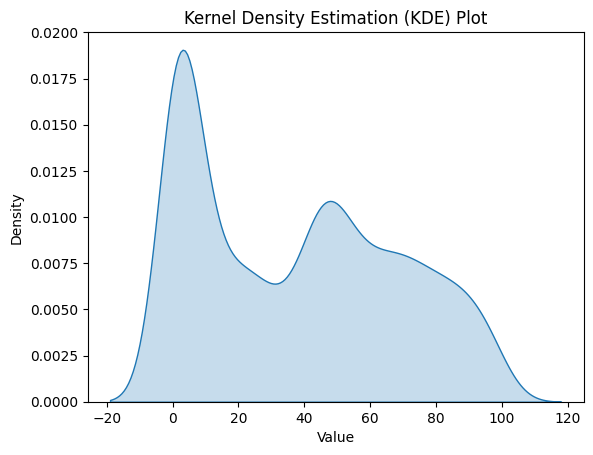

In [45]:
import seaborn as sns

sns.kdeplot(sorted_fin_labels, fill=True)
plt.title("Kernel Density Estimation (KDE) Plot")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

Total Mass (area under the curve): 0.8753728129529419


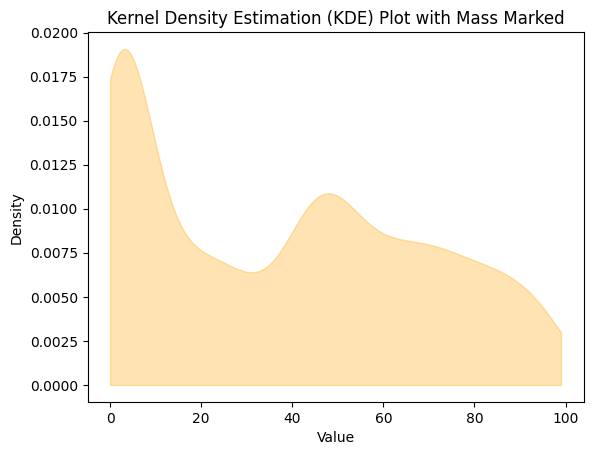

In [53]:
from scipy.stats import gaussian_kde

sample_data = sorted_fin_labels
kde = gaussian_kde(sample_data)

x_range = np.linspace(min(sample_data), max(sample_data), 1000)

mass = np.trapz(kde(x_range), x_range)

plt.fill_between(x_range, 0, kde(x_range), where=(x_range <= max(x_range)), interpolate=True, alpha=0.3, color='orange')

print("Total Mass (area under the curve):", mass)

plt.title("Kernel Density Estimation (KDE) Plot with Mass Marked")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

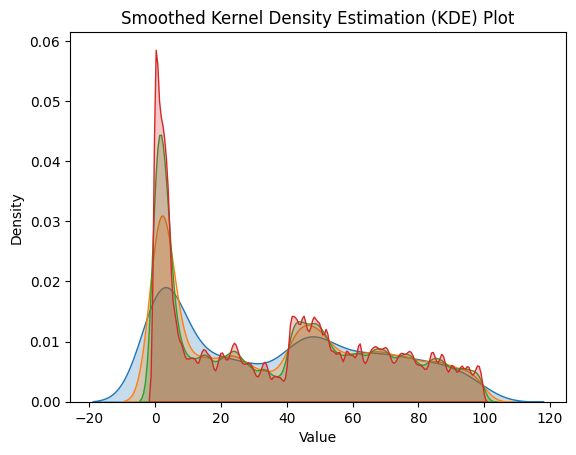

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sample_data = sorted_fin_labels

# Create a KDE plot with a smaller bandwidth for smoothing
kde = sns.kdeplot(sample_data, fill=True, bw_adjust=1)
kde = sns.kdeplot(sample_data, fill=True, bw_adjust=0.5)
kde = sns.kdeplot(sample_data, fill=True, bw_adjust=0.25)
kde = sns.kdeplot(sample_data, fill=True, bw_adjust=0.1)

plt.title("Smoothed Kernel Density Estimation (KDE) Plot")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

## Misc

In [ ]:
model_2.eval()
val_loss = 0.0
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        val_loss += loss.item()

average_val_loss = val_loss / len(val_loader)
print(f"Validation Loss: {average_val_loss}")

Validation Loss: 130.65498633501005


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_features, train_classes)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
preds = model_0.predict(val_features)

In [ ]:
import torch

In [ ]:
model_1 = torch.load('/content/drive/MyDrive/model_1.pth')
model_2 = torch.load('/content/drive/MyDrive/model_2.pth')
model_3 = torch.load('/content/drive/MyDrive/model_3.pth')

In [42]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_1.to(device)
model_2.to(device)
model_3.to(device)

model_1.eval()
model_2.eval()
model_3.eval()

class CustomRegressionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = float(self.labels[idx])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float32)
        }

val_texts = val_content

val_dataset = CustomRegressionDataset(val_texts, val_labels, tokenizer, max_length=128)
val_loader = DataLoader(val_dataset, batch_size=1)

val_loss = 0.0

cnt = 0

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        if val_classes[cnt] == 0:
          outputs = model_1(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
          loss = outputs.loss
        if val_classes[cnt] == 1:
          outputs = model_2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
          loss = outputs.loss
        if val_classes[cnt] == 2:
          outputs = model_3(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
          loss = outputs.loss

        val_loss += loss.item()
        cnt += 1
        # print(cnt)

average_val_loss = val_loss / len(val_loader)
print(f"Validation Loss: {average_val_loss}")

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

NameError: name 'model_1' is not defined